# Learning Polars for Data Exploration

## Load Library

In [79]:
import polars as pl
from plotnine import ggplot, aes, geom_point, geom_col, geom_density, geom_boxplot, labs, theme_minimal, theme_classic

## Load Dataset

In [2]:
raw_data = pl.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/refs/heads/main/dataset/hr_analytics_turnover_dataset/HR_comma_sep.csv")

In [4]:
# check dataset
raw_data

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""
…,…,…,…,…,…,…,…,…,…
0.4,0.57,2,151,3,0,1,0,"""support""","""low"""
0.37,0.48,2,160,3,0,1,0,"""support""","""low"""
0.37,0.53,2,143,3,0,1,0,"""support""","""low"""


## Data Inspection

Cek nama-nama kolom dari data

In [10]:
raw_data.columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

Cek struktur data

In [14]:
raw_data.glimpse()

Rows: 14999
Columns: 10
$ satisfaction_level    <f64> 0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92, 0.89, 0.42
$ last_evaluation       <f64> 0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85, 1.0, 0.53
$ number_project        <i64> 2, 5, 7, 5, 2, 2, 6, 5, 5, 2
$ average_montly_hours  <i64> 157, 262, 272, 223, 159, 153, 247, 259, 224, 142
$ time_spend_company    <i64> 3, 6, 4, 5, 3, 3, 4, 5, 5, 3
$ Work_accident         <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ left                  <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ promotion_last_5years <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ sales                 <str> 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales'
$ salary                <str> 'low', 'medium', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low'



Cek 5 baris data teratas

In [15]:
raw_data.head()

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""


Cek jumlah data yang hilang

In [12]:
raw_data.null_count()

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


Cek summary dari data

In [6]:
raw_data.describe()

statistic,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
str,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,"""14999""","""14999"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268,null,null
"""std""",0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,null,null
"""min""",0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,"""IT""","""high"""
"""25%""",0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0,null,null
"""50%""",0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,null,null
"""75%""",0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0,null,null
"""max""",1.0,1.0,7.0,310.0,10.0,1.0,1.0,1.0,"""technical""","""medium"""


Pilih kolom "satisfaction_level"

In [13]:
raw_data.select(
    pl.col("satisfaction_level"),
    pl.col("last_evaluation")
)

satisfaction_level,last_evaluation
f64,f64
0.38,0.53
0.8,0.86
0.11,0.88
0.72,0.87
0.37,0.52
…,…
0.4,0.57
0.37,0.48
0.37,0.53


## Data Preprocessing

Mengganti nama kolom "sales" menjadi "role"

In [25]:
raw_data = raw_data.rename({"sales": "role"})

In [26]:
raw_data.glimpse()

Rows: 14999
Columns: 10
$ satisfaction_level    <f64> 0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92, 0.89, 0.42
$ last_evaluation       <f64> 0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85, 1.0, 0.53
$ number_project        <i64> 2, 5, 7, 5, 2, 2, 6, 5, 5, 2
$ average_montly_hours  <i64> 157, 262, 272, 223, 159, 153, 247, 259, 224, 142
$ time_spend_company    <i64> 3, 6, 4, 5, 3, 3, 4, 5, 5, 3
$ Work_accident         <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ left                  <i64> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ promotion_last_5years <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ role                  <str> 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales', 'sales'
$ salary                <str> 'low', 'medium', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low'



## Data Exploration

Cek distribusi kolom "left"

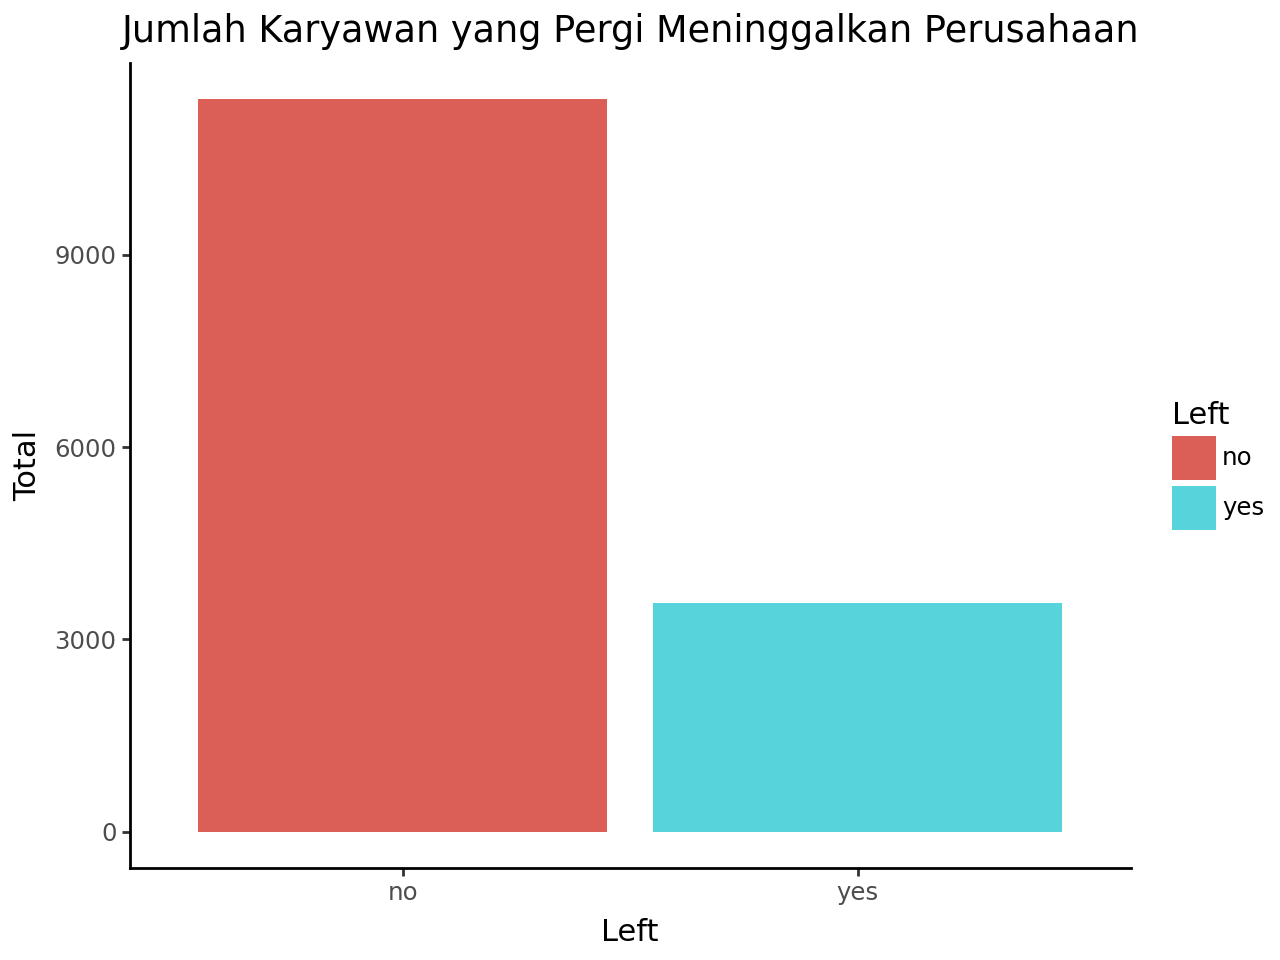

In [82]:
(
    # visualisasikan menggunakan ggplot
    ggplot(
        # agregasi datanya
        raw_data.with_columns(
            pl.when(
                pl.col("left") == 1
            ).then(pl.lit("yes")).otherwise(pl.lit("no")).alias("left")
        ).group_by("left").len(),
        # pilih x = "left" dan y = "len"
        aes(x="left", y="len", fill = "left")
    )
    # visualisasikan sebagai column chart
    + geom_col()
    # ubah labeling pada plot
    + labs(
        title = "Jumlah Karyawan yang Pergi Meninggalkan Perusahaan",
        x = "Left",
        y = "Total",
        fill = "Left"
    ) 
    + theme_classic()
)

Cek distribusi "role"

In [36]:
raw_data.group_by(
    pl.col("role")
).len().sort(by="len", descending=True)

role,len
str,u32
"""sales""",4140
"""technical""",2720
"""support""",2229
"""IT""",1227
"""product_mng""",902
"""marketing""",858
"""RandD""",787
"""accounting""",767
"""hr""",739


Cek distribusi salary

In [37]:
raw_data.group_by(
    pl.col("salary")
).len()

salary,len
str,u32
"""low""",7316
"""medium""",6446
"""high""",1237


Cek berapa banyak yang mendapat promosi dalam 5 tahun terakhir.

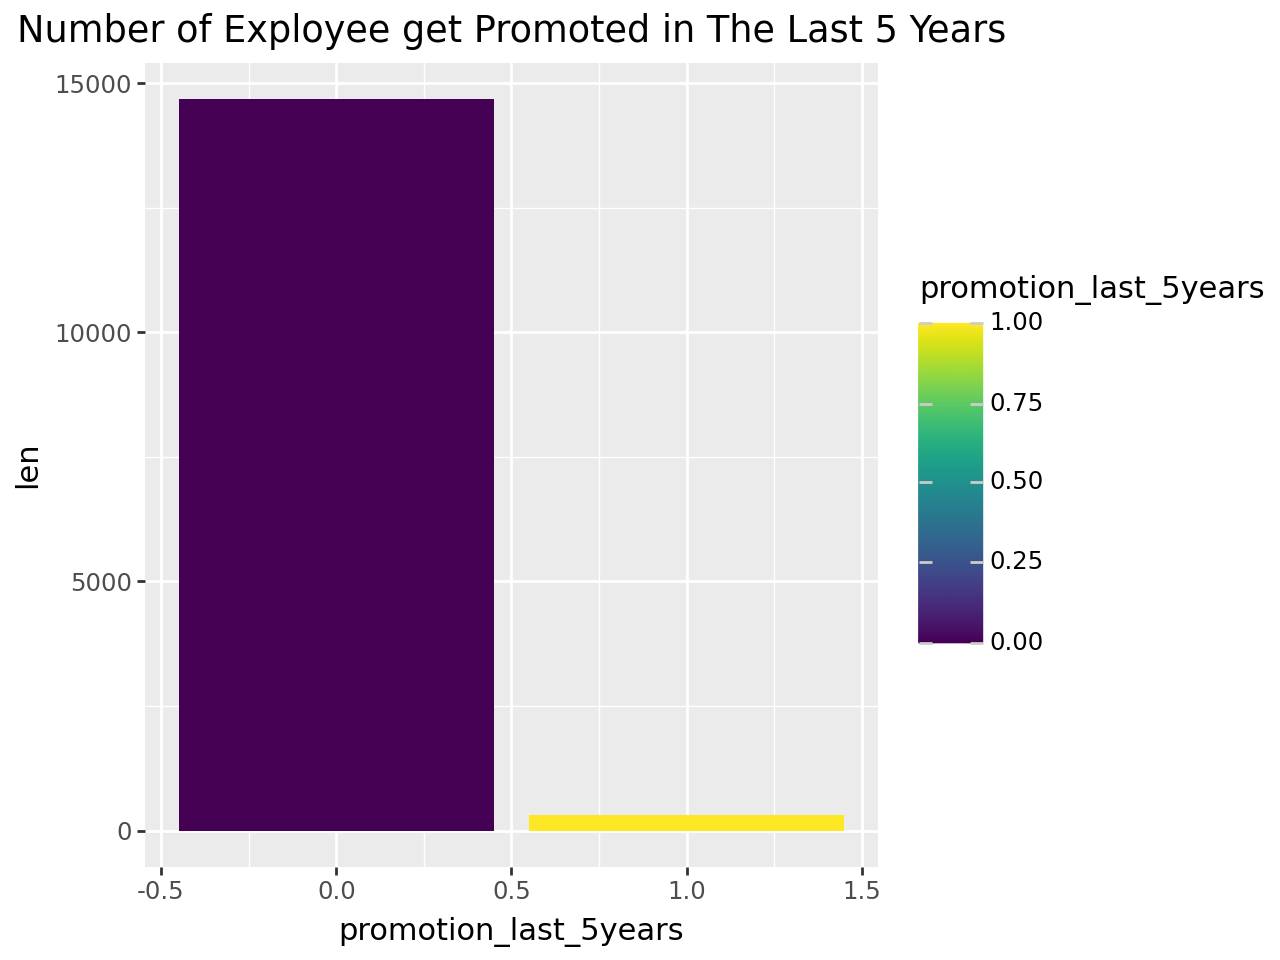

In [60]:
(
    ggplot(
        raw_data.group_by(pl.col("promotion_last_5years")).len(),
        aes(x="promotion_last_5years", y = "len", fill="promotion_last_5years")
    ) 
    + geom_col()
    + labs(title = "Number of Exployee get Promoted in The Last 5 Years")
)